<a href="https://colab.research.google.com/github/Gcango/Analise_da_BD_Imoveis_SOIMOVE/blob/main/Analise_daBD_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio no ambito do curso da Comunidade de DS.
A SOIMOVEL, é uma empresa imobiliaria tendo em sua base de dados mais 48895 imoveis. Com objectivo de auxiliar os gerentes para uma tomada de decisão, depois de expolorar a Base de Dados, devem ser respondidas algumas questões que encaminhadas:
a) - Quais são as categorias de immoveis que estao na BD
b) - Quantos Hosts unicos existem cadastrados
c) - Calcular o desvio Padrão em torno da media dos preços dos imoveis
d) - Quais apartamentos estão dentro da faixa de de preço de < 1100 USD
e) - Qual é a Distribuição do numeros de REViwes
f) - Qual é o intervalo de variação do preço dos alugueis dos imóveis?
g) - Qual a distribuição dos imóveis de acordo com o número mínimo de pernoites que podem ser agendado?
h) - Qual a média e a mediana de imóveis cadastrado por host (dono do imóvel)?
i) - Qual a data mais recente da última avaliação
j) - Qual o valor máximo de pernoites agendadas?
k) - Quantos nomes de donos de imóveis são únicos?
l) - Quantos identificadores únicos existem na base de dados?
m) - Quantidade de proprietários por região.
n) - Qual é Preço médio do aluguel por região
o) - Qual é o Número de avaliações média por tipo de quarto
p) - Qual é Desvio Padrão do preço do aluguel por região e tipo de quarto
q) - Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?
r) - Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?
s) - Conseguimos saber onde estão localizados os imóveis pelo seu tipo?
t) - Qual a média de preço por região?
u) - Qual o maior valor do aluguel por bairro e por tipo de quarto?
v) - Qual o menor valor de latitude região?
x) - Faça um histograma somente com os proprietários que possuem mais de um imóvel listado na base de dados de NY
w) - Desenhe um mapa com os imóveis mais baratos por região
y) - Desenhe um mapa com os imóveis que possuem o maior número de avaliações por região
z) - Desenhe um mapa somente com 100 imóveis do tipo “private room”
escolhidos aleatoriamente
a.1) - #Desenhe um mapa somente com 100 imóveis do tipo “shared room” escolhidos aleatoriamente


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import folium

In [ ]:
dados = pd.read_csv("/content/AB_NYC_2019.csv")
dados.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
#Exploração da Base de Dados

In [ ]:
dados.shape

(48895, 16)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
dados.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
dados.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Respondendo questões dos gerentes

In [ ]:
# a) - Quais são as categorias de imoveis que estao na BD
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
categ_imoveis = dados['room_type'].unique()
print("As Categorias Existente na Base de Dados são: ", categ_imoveis)

As Categorias Existente na Base de Dados são:  ['Private room' 'Entire home/apt' 'Shared room']


In [ ]:
#b) - Quantos Hosts unicos existem cadastrados
host_unicos = len(dados['host_id'].unique())
print("O numero dos Hosts Únicos Cadastrados na Base de Dados é de: ", host_unicos)

O numero dos Hosts Únicos Cadastrados na Base de Dados é de:  37457


In [ ]:
#c) - Calcular o desvio PAdrão em torno da media dos preços dos imoveis
preco = dados['price']
desv_padrao = preco.std()
media_preco = preco.mean()
print("O desvio padrão do preso dos imóveis é USD = ", round(desv_padrao, 3))
print(" A média dos presos dos imóveis é USD = ", round(media_preco, 3))

O desvio padrão do preso dos imóveis é USD =  240.154
 A média dos presos dos imóveis é USD =  152.721


In [ ]:
#d) - Quais apartamentos estão dentro da faixa de de preço de < 110 USD
linhas = dados.loc[:,'price'] < 1100
faixa_1100 = dados.loc[linhas, 'price']
print(" O Maior preço desta seleção é de USD = ", round(faixa_1100.max(), 3))

 O Maior preço desta seleção é de USD =  1099


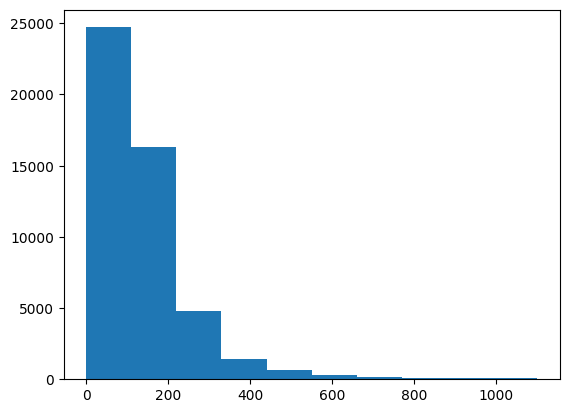

In [ ]:
plt.hist(faixa_1100, bins=10);

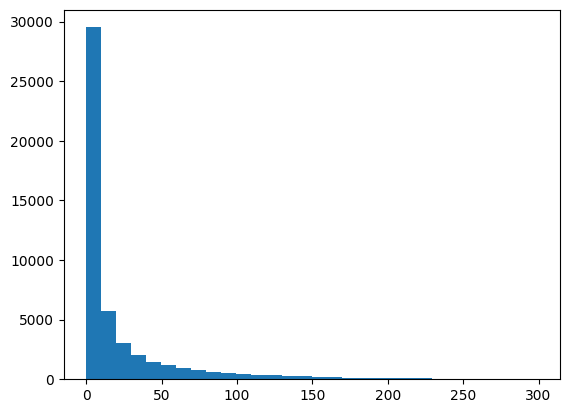

In [ ]:
#e) - Qual é a Distribuição do numeros de Reviwes
reviwes_a = dados.loc[:,'number_of_reviews'] < 300
distr_reviwes = dados.loc[reviwes_a, 'number_of_reviews']

plt.hist(distr_reviwes, bins=30);

In [ ]:
#f) - Qual é o intervalo de variação do preço dos alugueis dos imóveis?

dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
print(f"O preço médio de dos imoveis é USD {media_preco:.2f}. E varia +/- em torno de USD {desv_padrao:.2f}")

O preço médio de dos imoveis é USD 152.72. E varia +/- em torno de USD 240.15


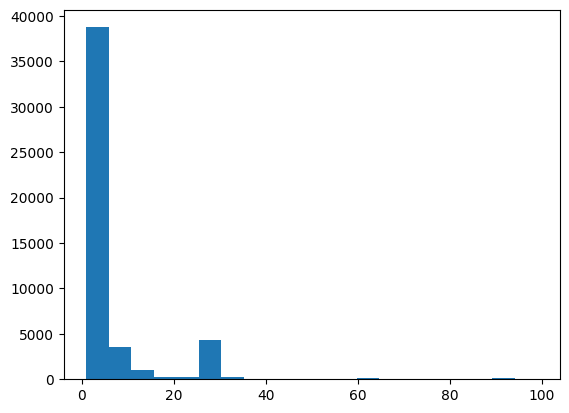

In [ ]:
#g) - Qual a distribuição dos imóveis de acordo com o número mínimo de pernoites que podem ser agendado?
data = 'minimum_nights'
data_b = dados.loc[:,data] < 100

minimo_pernoite = dados.loc[data_b, data]

plt.hist(minimo_pernoite, bins=20);

In [ ]:
#h) - Qual a média e a mediana de imóveis cadastrado por host (dono do imóvel)?
media_imov_cad = dados['calculated_host_listings_count'].mean()
mediana_imov_cad = dados['calculated_host_listings_count'].median()

print(f" A média de Imoveis Cadastrados é de = {media_imov_cad:.2f}.")
print(f" A mediana de Imoveis Cadastrados é de = {mediana_imov_cad:.2f}.")

 A média de Imoveis Cadastrados é de = 7.14.
 A mediana de Imoveis Cadastrados é de = 1.00.


In [ ]:
#i) - Qual a data mais recente da última avaliação
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
avaliacoes = dados['last_review'].sort_values(ascending=True)
print("A data mais recente da Ultima avaliação foi a ", avaliacoes[317])

A data mais recente da Ultima avaliação foi a  2011-03-28


In [ ]:
#j) - Qual o valor máximo de pernoites agendadas?
maximo_noite = dados['minimum_nights'].max()
print("P valor máximo agendado por noite é de USD:",maximo_noite)

P valor máximo agendado por noite é de USD: 1250


In [ ]:
#k) - Quantos nomes de donos de imóveis são únicos?
nomes_unicos = dados['host_id'].nunique()
print(f"No Total a Base de dados contem {nomes_unicos} Nomes Unicos de donos dos Imoveis")

No Total a Base de dados contem 37457 Nomes Unicos de donos dos Imoveis


In [ ]:
#l) - Quantos identificadores únicos existem na base de dados?
id_unicos = dados['id'].nunique()
print(f"No Total a Base de dados contem {id_unicos} ID Unico")

No Total a Base de dados contem 48895 ID Unico


In [ ]:
#m) -  Qual é Quantidade de proprietários por região.
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
dados[['host_id','neighbourhood_group']].groupby('neighbourhood_group').nunique().reset_index()

,neighbourhood_group,host_id
0,Bronx,789
1,Brooklyn,15966
2,Manhattan,16578
3,Queens,3983
4,Staten Island,256


In [ ]:
#n) - Qual é o Preço médio do aluguel por região?

dados[['price','neighbourhood_group']].groupby('neighbourhood_group').mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [ ]:
#o) - Qual é o Número de avaliações média por tipo de quarto.
dados[['number_of_reviews','room_type']].groupby('room_type').mean().reset_index()

,room_type,number_of_reviews
0,Entire home/apt,22.842418
1,Private room,24.112962
2,Shared room,16.600000


In [ ]:
#p) - Qual é o Desvio Padrão do preço do aluguel por região e tipo de quarto.
dados[['price','neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type']).std().reset_index()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,95.027102
1,Bronx,Private room,107.009071
2,Bronx,Shared room,101.798871
3,Brooklyn,Entire home/apt,226.415825
4,Brooklyn,Private room,124.713499
5,Brooklyn,Shared room,53.444485
6,Manhattan,Entire home/apt,331.830132
7,Manhattan,Private room,190.191318
8,Manhattan,Shared room,92.416534
9,Queens,Entire home/apt,129.383208


In [ ]:
#q) - Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?
valor_alugel_NY = dados[['price','neighbourhood_group']].groupby('neighbourhood_group').max().reset_index()
valor_alugel_NY

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


In [ ]:
px.bar(valor_alugel_NY, x='neighbourhood_group', y='price')

In [ ]:
#r) - Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?
colunas = ['price','neighbourhood_group','latitude','longitude']
colunas_group = ['neighbourhood_group']

imo_mais_caro_NY = dados.loc[:,colunas].groupby(colunas_group).max().reset_index()
imo_mais_caro_NY

,neighbourhood_group,price,latitude,longitude
0,Bronx,2500,40.91306,-73.78158
1,Brooklyn,10000,40.73890,-73.85676
2,Manhattan,10000,40.87665,-73.90855
3,Queens,10000,40.79721,-73.71299
4,Staten Island,5000,40.64779,-74.06092


In [ ]:
f = folium.Figure( width=1024, height=768 )

map = folium.Map(
      location=[imo_mais_caro_NY['latitude'].mean(),
                imo_mais_caro_NY['longitude'].mean()],
       zoom_start=14,
       control_scale=True
)

for index, location_info in imo_mais_caro_NY.iterrows():
    folium.Marker([location_info['latitude'],
                    location_info['longitude']],
                    popup=location_info['neighbourhood_group']).add_to(map)

map

In [104]:
#s) -  Onde estão estes imoveis, distribuidos pelo seu tipo?
colunas = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
dist_tipo = dados.loc[:,colunas].sample(100)

# Criando uma nova coluna chamada 'color'
dist_tipo.loc[:, 'color'] = 'NA'

# Selecionando as linhas do segmento
linhas_private_room = dist_tipo.loc[:, 'room_type'] == 'Private room'
linhas_entire_apt = dist_tipo.loc[:, 'room_type'] == 'Entire home/apt'
linhas_shared_room = dist_tipo.loc[:, 'room_type'] == 'Shared room'

# Colocando as cores para cada segmento
dist_tipo.loc[linhas_private_room, 'color'] = 'darkgreen'
dist_tipo.loc[linhas_entire_apt, 'color'] = 'darkred'
dist_tipo.loc[linhas_shared_room, 'color'] = 'purple'

# Criando a área do mapa
map = folium.Map()

# Adicionando os pins nos mapas
for index, location_info in dist_tipo.iterrows():
    folium.Marker([location_info['latitude'],
                   location_info['longitude']],
                    popup=location_info[['neighbourhood_group', 'room_type']],
                    icon=folium.Icon( color=location_info['color'])).add_to( map )


# Exibindo o mapa
map

In [106]:
#t) - Qual é a média de preço por região?
media_preco_reg = dados[['price','neighbourhood_group']].groupby('neighbourhood_group').mean().reset_index()
media_preco_reg

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [109]:
#u) - Qual é o maior valor do aluguel por bairro e por tipo de quarto?
maior_alug_bairro_quarto = dados[['price','neighbourhood','room_type']].groupby(['neighbourhood','room_type']).max().reset_index()
maior_alug_bairro_quarto

,neighbourhood,room_type,price
0,Allerton,Entire home/apt,450
1,Allerton,Private room,142
2,Arden Heights,Entire home/apt,83
3,Arden Heights,Private room,41
4,Arrochar,Entire home/apt,625
...,...,...,...
535,Woodlawn,Shared room,70
536,Woodrow,Entire home/apt,700
537,Woodside,Entire home/apt,500
538,Woodside,Private room,475


In [110]:
#v) - Qual é o menor valor de latitude por região?
menor_latit_regiao = dados[['latitude', 'neighbourhood_group']].groupby('neighbourhood_group').min().reset_index()
menor_latit_regiao

,neighbourhood_group,latitude
0,Bronx,40.80011
1,Brooklyn,40.57115
2,Manhattan,40.70234
3,Queens,40.56546
4,Staten Island,40.49979


In [111]:
#x) Faça um histograma somente com os proprietários que possuem mais de um imóvel listado na base de dados de NY.
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

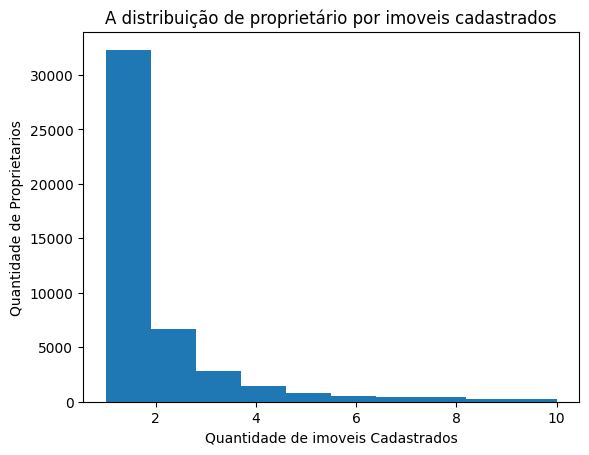

In [113]:
colunas = ['host_id', 'calculated_host_listings_count']
linhas = dados.loc[:, 'calculated_host_listings_count'] <=10

proprit_imovel = dados.loc[linhas, 'calculated_host_listings_count']

plt.hist(proprit_imovel, bins=10);
plt.title('A distribuição de proprietário por imoveis cadastrados');
plt.xlabel('Quantidade de imoveis Cadastrados');
plt.ylabel('Quantidade de Proprietarios');

In [114]:
#w) - Desenhe um mapa com os imóveis mais baratos por região.

# encontrar os imoveis mais baratos por região
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']
colunas_groupby = 'neighbourhood_group'
min_preco_reg = dados.loc[:, colunas].groupby( colunas_groupby ).min().reset_index()
min_preco_reg

# desenhar o mapa
map = folium.Map()
for index, location_info in min_preco_reg.iterrows():
    folium.Marker( [location_info['latitude'],
    location_info['longitude']],
    popup=location_info[['neighbourhood_group', 'price']]).add_to( map )

map

In [115]:
#y) Desenhe um mapa com os imóveis que possuem o maior número de avaliações por região.
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [116]:
# Imoveis com maior numero de avaliacoes
colunas = ['number_of_reviews', 'neighbourhood_group', 'latitude', 'longitude']
colunas_groupby = 'neighbourhood_group'
data_plot = dados.loc[:, colunas].groupby(colunas_groupby ).max().reset_index()


# Desenhar o mapa
map = folium.Map()
for index, location_info in data_plot.iterrows():
    folium.Marker( [location_info['latitude'],
    location_info['longitude']],
    popup=location_info['neighbourhood_group']).add_to( map )

map

In [117]:
#z) - Desenhe um mapa somente com 100 imóveis do tipo “private room” escolhidos aleatoriamente

# sortear 100 imoveis aleatoriamente
colunas = ['room_type', 'latitude', 'longitude']
linhas = dados.loc[:, 'room_type'] == 'Private room'
data_plot = dados.loc[linhas, colunas].sample( 100 )

# desenhar o mapa
map = folium.Map()
for index, location_info in data_plot.iterrows():
    folium.Marker( [location_info['latitude'],
    location_info['longitude']],
    popup=location_info['room_type']).add_to( map )

map

In [118]:
#a.1) - Desenhe um mapa somente com 100 imóveis do tipo “shared room” escolhidos aleatoriamente

# sortear 100 imoveis aleatoriamente
colunas = ['room_type', 'latitude', 'longitude']
linhas = dados.loc[:, 'room_type'] == 'Shared room'
data_plot = dados.loc[linhas, colunas].sample( 100 )


# desenhar o mapa
map = folium.Map()
for index, location_info in data_plot.iterrows():
    folium.Marker( [location_info['latitude'],
    location_info['longitude']],
    popup=location_info['room_type']).add_to( map )

map